In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.cluster import KMeans

c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Cargar datos relevantes desde 'dataset vivienda y urbanismo.xlsx'
df_densidad = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Densidad poblacional')
df_crecimiento = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Zonas Crecimiento Urbano')
df_proyeccion = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Proyecciones Expansión Urbana')

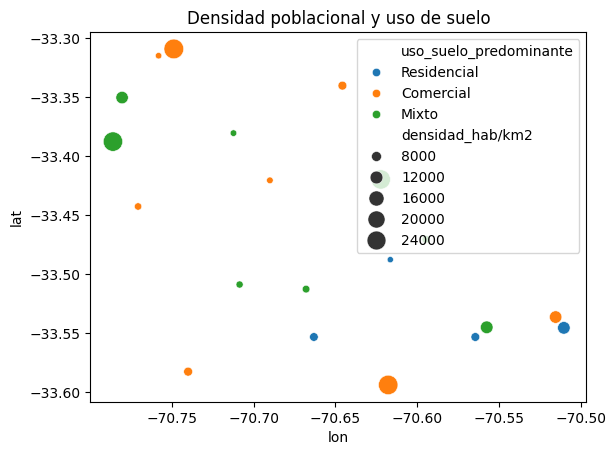

In [5]:
# 1. Densidad poblacional y uso de suelo
sns.scatterplot(data=df_densidad, x="lon", y="lat", hue="uso_suelo_predominante", size="densidad_hab/km2", sizes=(20, 200))
plt.title("Densidad poblacional y uso de suelo")
plt.show()

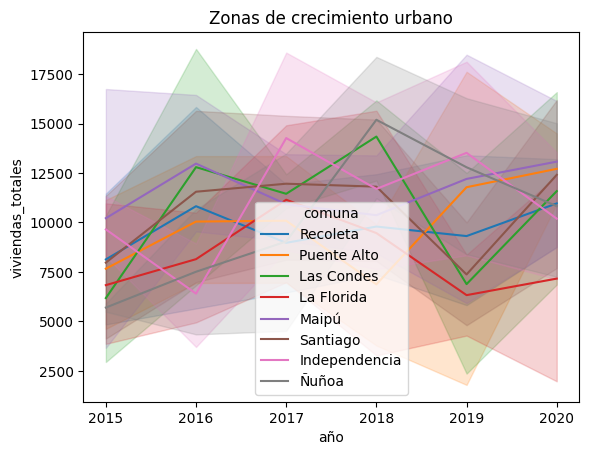

In [6]:
# 2. Crecimiento urbano
sns.lineplot(data=df_crecimiento, x="año", y="viviendas_totales", hue="comuna")
plt.title("Zonas de crecimiento urbano")
plt.show()


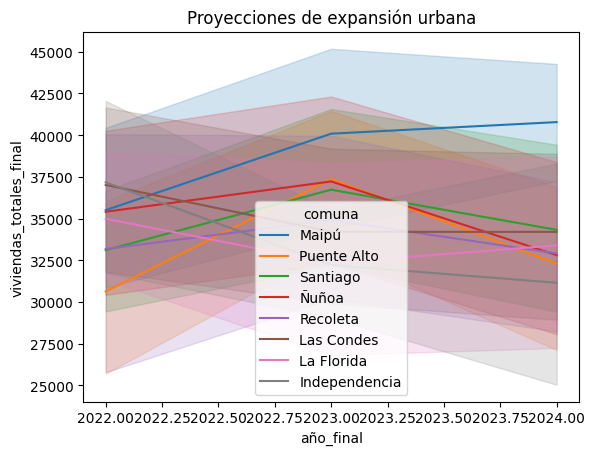

In [7]:
# 3. Proyecciones de expansión urbana
sns.lineplot(data=df_proyeccion, x="año_final", y="viviendas_totales_final", hue="comuna")
plt.title("Proyecciones de expansión urbana")
plt.show()


In [8]:
# PLANIFICACIÓN URBANA Y VIVIENDA
from statsmodels.tsa.arima.model import ARIMA

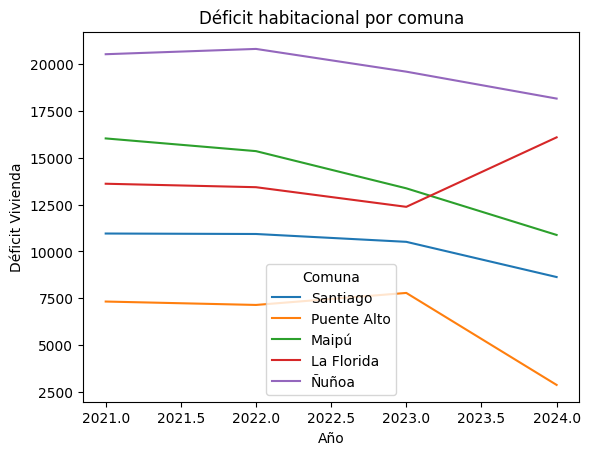

In [9]:
# 4. Déficit habitacional
df_deficit = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Deficit habitacional')

sns.lineplot(data=df_deficit, x="Año", y="Déficit Vivienda", hue="Comuna")
plt.title("Déficit habitacional por comuna")
plt.show()

In [10]:
# 5. Modelo ARIMA ejemplo
serie = df_deficit[df_deficit['Comuna'] == 'Santiago'].set_index('Año')['Déficit Vivienda']
modelo = ARIMA(serie, order=(1,1,1))
resultado = modelo.fit()
print(resultado.forecast(steps=3))

4    8500.018651
5    8404.637036
6    8332.422754
Name: predicted_mean, dtype: float64


c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations t

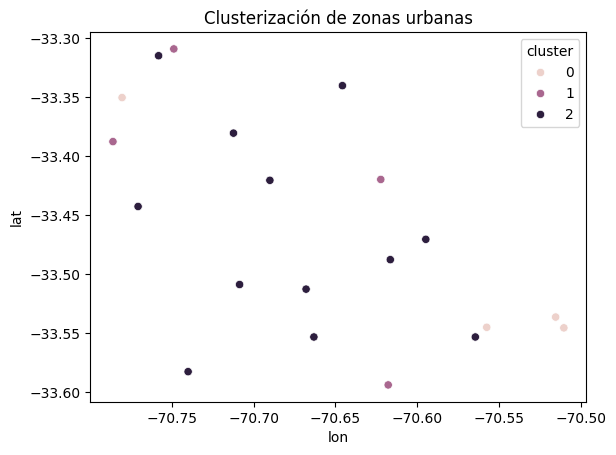

In [11]:
# 6. Clusterización de barrios
X = df_densidad[["densidad_hab/km2"]].dropna()
kmeans = KMeans(n_clusters=3)
df_densidad['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data=df_densidad, x="lon", y="lat", hue="cluster")
plt.title("Clusterización de zonas urbanas")
plt.show()

In [4]:
# GESTIÓN DE PROYECTOS URBANOS
from datetime import datetime

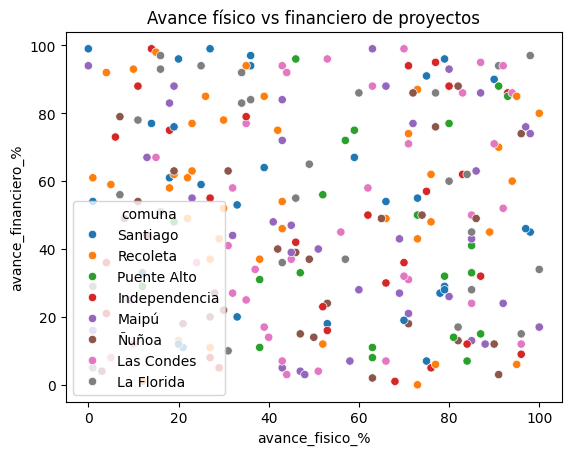

In [3]:
df_proyectos = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Cuellos de Botella Proyectos')
df_proyectos['fecha_inicio'] = pd.to_datetime(df_proyectos['fecha_inicio'])
df_proyectos['fecha_termino'] = pd.to_datetime(df_proyectos['fecha_termino'])
df_proyectos['duracion_dias'] = (df_proyectos['fecha_termino'] - df_proyectos['fecha_inicio']).dt.days

sns.scatterplot(data=df_proyectos, x="avance_fisico_%", y="avance_financiero_%", hue="comuna")
plt.title("Avance físico vs financiero de proyectos")
plt.show()

In [5]:
# ANALISIS ESPACIAL Y GEOESPACIAL
import folium
from folium.plugins import MarkerCluster

In [15]:
m = folium.Map(location=[-33.45, -70.66], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)

for i, row in df_densidad.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], popup=f"{row['comuna']}, {row['densidad_hab/km2']} hab/km2").add_to(marker_cluster)

m.save("mapa_densidad.html")


In [6]:
# POLÍTICAS PÚBLICAS
import plotly.express as px
import nbformat

In [16]:
df_politicas = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Politicas publicas')
fig = px.bar(df_politicas, x="Política", y="Subsidios Otorgados", color="Comuna", barmode="group")
fig.show()

In [7]:
# AUTOMATIZACIÓN Y DASHBOARD
import streamlit as st


In [25]:
def app():
    st.set_page_config(layout="wide")
    st.title("Dashboard Urbano - Análisis Integral")

    # Cargar nuevamente df_modelo aquí
    df_modelo = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Modelos predictivos')
    X = df_modelo[["Densidad Hab/km2", "Servicios Básicos"]]
    y = df_modelo["Valor UF/m2"]
    modelo_rf = RandomForestRegressor()
    modelo_rf.fit(X, y)
    pred = modelo_rf.predict(X)
    df_modelo['pred_uf_m2'] = pred

    st.header("Déficit habitacional por comuna")
    comuna_seleccionada = st.selectbox("Selecciona una comuna", df_deficit['Comuna'].unique())
    df_comuna = df_deficit[df_deficit['Comuna'] == comuna_seleccionada]
    st.line_chart(df_comuna.set_index('Año')['Déficit Vivienda'])

    st.header("Densidad poblacional")
    st.map(df_densidad.rename(columns={"lat": "latitude", "lon": "longitude"}))

    st.header("Avance físico vs financiero de proyectos")
    st.dataframe(df_proyectos[['comuna', 'avance_fisico_%', 'avance_financiero_%', 'duracion_dias']])

    st.header("Proyección de valor UF/m2")
    st.dataframe(df_modelo[['Comuna', 'Valor UF/m2', 'pred_uf_m2']])

    st.header("Subsidios otorgados por política")
    st.dataframe(df_politicas)


In [8]:
# MACHINE LEARNING Y PREDICTIVOS
from sklearn.ensemble import RandomForestRegressor

df_modelo = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Modelos predictivos')
X = df_modelo[["Densidad Hab/km2", "Servicios Básicos"]]
y = df_modelo["Valor UF/m2"]

modelo_rf = RandomForestRegressor()
modelo_rf.fit(X, y)
pred = modelo_rf.predict(X)
df_modelo['pred_uf_m2'] = pred
print(df_modelo[['Comuna', 'Valor UF/m2', 'pred_uf_m2']])


         Comuna  Valor UF/m2  pred_uf_m2
0      Santiago        49.10     49.3650
1      Santiago        52.68     49.1637
2      Santiago        31.35     40.6844
3      Santiago        56.04     49.8197
4   Puente Alto        57.13     56.1404
5   Puente Alto        52.02     53.9942
6   Puente Alto        59.11     58.2560
7   Puente Alto        58.08     57.9367
8         Maipú        34.70     35.8632
9         Maipú        30.74     34.5960
10        Maipú        45.90     45.6353
11        Maipú        58.94     48.7836
12   La Florida        33.08     39.9158
13   La Florida        31.11     32.3786
14   La Florida        35.97     36.7913
15   La Florida        59.19     51.6357
16        Ñuñoa        59.39     57.2604
17        Ñuñoa        50.62     52.1009
18        Ñuñoa        35.73     42.7755
19        Ñuñoa        55.32     52.5705


In [9]:
df_deficit = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Deficit habitacional')
df_proyectos = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Cuellos de Botella Proyectos')
df_politicas = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Politicas publicas')
df_modelo = pd.read_excel('dataset vivienda y urbanismo.xlsx', sheet_name='Modelos predictivos')


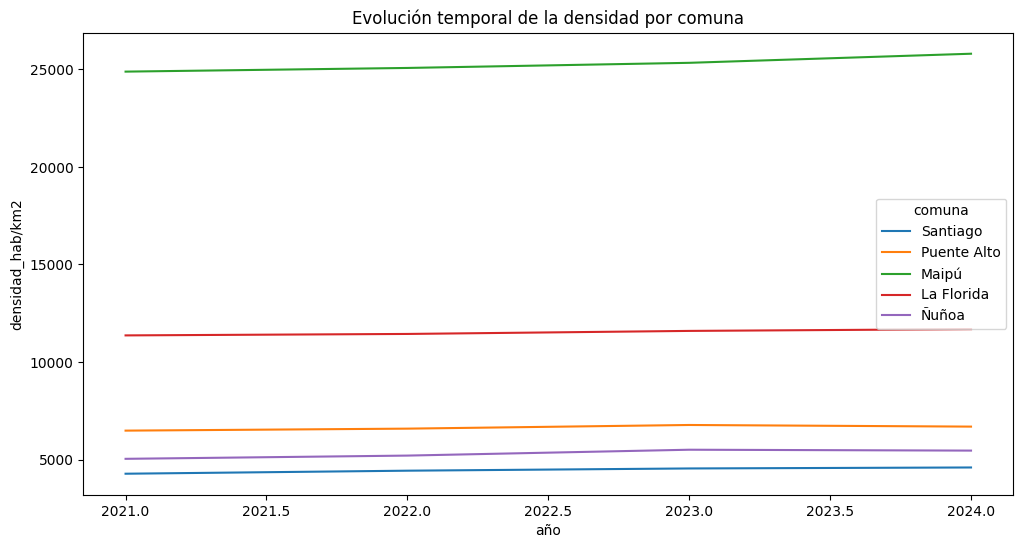

In [27]:
# 1. Evolución temporal de densidad por comuna
plt.figure(figsize=(12,6))
sns.lineplot(data=df_densidad, x='año', y='densidad_hab/km2', hue='comuna')
plt.title('Evolución temporal de la densidad por comuna')
plt.show()

In [28]:
# 2. Zonas subutilizadas: baja densidad con gran superficie
df_densidad['densidad_baja'] = df_densidad['densidad_hab/km2'] < df_densidad['densidad_hab/km2'].quantile(0.25)
subutilizadas = df_densidad[df_densidad['densidad_baja'] & (df_densidad['superficie_km2'] > df_densidad['superficie_km2'].median())]
print("Zonas potenciales de desarrollo:")
print(subutilizadas[['comuna', 'densidad_hab/km2', 'superficie_km2']])

Zonas potenciales de desarrollo:
Empty DataFrame
Columns: [comuna, densidad_hab/km2, superficie_km2]
Index: []


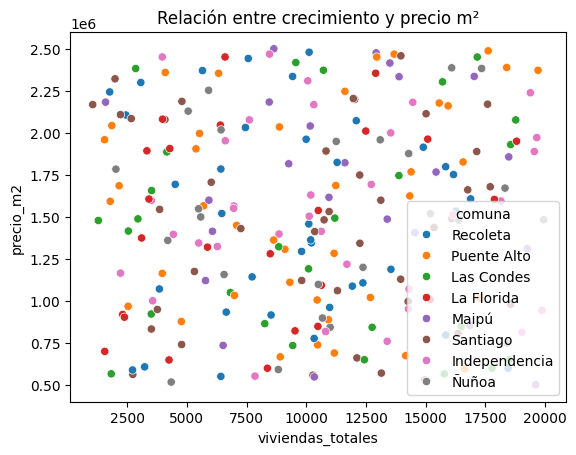

In [29]:
# 3. Relación entre viviendas y precio m2 en zonas de crecimiento
sns.scatterplot(data=df_crecimiento, x='viviendas_totales', y='precio_m2', hue='comuna')
plt.title('Relación entre crecimiento y precio m²')
plt.show()

In [52]:
# 4. Zonas con presión inmobiliaria: alta densidad + alto déficit
df_deficit_ren = df_deficit.rename(columns={"Comuna": "comuna"})
df_presion = df_crecimiento.merge(df_deficit_ren, on='comuna')
df_presion['presion'] = df_presion['densidad_poblacional'] * df_presion['Déficit Vivienda']
top_presion = df_presion.sort_values('presion', ascending=False).head(10)
print("Zonas con mayor presión inmobiliaria:")
print(top_presion[['comuna', 'densidad_poblacional', 'Déficit Vivienda', 'presion']])


Zonas con mayor presión inmobiliaria:
    comuna  densidad_poblacional  Déficit Vivienda    presion
129  Ñuñoa                 23619             20814  491605866
128  Ñuñoa                 23619             20531  484921689
229  Ñuñoa                 23260             20814  484133640
228  Ñuñoa                 23260             20531  477551060
130  Ñuñoa                 23619             19599  462908781
230  Ñuñoa                 23260             19599  455872740
257  Ñuñoa                 21635             20814  450310890
256  Ñuñoa                 21635             20531  444188185
131  Ñuñoa                 23619             18161  428944659
601  Ñuñoa                 20479             20814  426249906


In [32]:
# 5. Ranking de comunas con mayor proyección
df_proyeccion['crecimiento'] = df_proyeccion['viviendas_totales_final'] - df_proyeccion['viviendas_totales_inicio']
ranking = df_proyeccion.groupby('comuna')['crecimiento'].sum().sort_values(ascending=False).reset_index()
print("Ranking de crecimiento proyectado:")
print(ranking)

Ranking de crecimiento proyectado:
          comuna  crecimiento
0          Ñuñoa       888140
1    Puente Alto       881965
2       Santiago       796784
3          Maipú       773446
4     La Florida       768859
5       Recoleta       745552
6     Las Condes       742265
7  Independencia       678893


In [10]:
# 6. Estimación de demanda futura (servicios básicos estimados como 1 por cada 5 viviendas nuevas)
df_proyeccion['demanda_servicios'] = (df_proyeccion['viviendas_totales_final'] - df_proyeccion['viviendas_totales_inicio']) / 5
print("Demanda futura estimada de servicios básicos:")
print(df_proyeccion[['comuna', 'año_final', 'demanda_servicios']])

Demanda futura estimada de servicios básicos:
            comuna  año_final  demanda_servicios
0            Maipú       2022             7277.4
1      Puente Alto       2024             4287.4
2         Santiago       2024             4252.0
3            Ñuñoa       2022             3200.6
4         Recoleta       2024             3972.8
..             ...        ...                ...
245  Independencia       2023             5239.2
246     Las Condes       2023             3685.2
247  Independencia       2022             6067.8
248          Ñuñoa       2022             1602.4
249    Puente Alto       2023             7158.8

[250 rows x 3 columns]


In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Mostrar el DataFrame completo
print(df_proyeccion)

            comuna  año_inicial  año_final  viviendas_totales_inicio  \
0            Maipú         2016       2022                      5083   
1      Puente Alto         2018       2024                      1745   
2         Santiago         2016       2024                      9749   
3            Ñuñoa         2016       2022                     18325   
4         Recoleta         2015       2024                     19680   
5            Maipú         2015       2022                     18323   
6         Santiago         2017       2023                     18994   
7         Recoleta         2017       2022                      2725   
8            Ñuñoa         2017       2022                     13213   
9       Las Condes         2017       2024                     10528   
10      La Florida         2015       2023                     15162   
11      Las Condes         2015       2022                      9853   
12     Puente Alto         2015       2023                      

In [34]:
# 7. Mapa zonas emergentes con folium
import folium
emergentes = df_crecimiento[df_crecimiento['viviendas_totales'] > df_crecimiento['viviendas_totales'].quantile(0.75)]
m = folium.Map(location=[-33.45, -70.66], zoom_start=10)
for i, row in emergentes.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=5,
        popup=f"{row['comuna']} ({row['viviendas_totales']} viviendas)",
        color='green', fill=True).add_to(m)
m.save("mapa_emergentes.html")

In [35]:
# 8. Tiempo entre etapas (si existieran columnas de fechas intermedias, se agregaría análisis aquí)
df_proyectos['fecha_inicio'] = pd.to_datetime(df_proyectos['fecha_inicio'])
df_proyectos['fecha_termino'] = pd.to_datetime(df_proyectos['fecha_termino'])
df_proyectos['duracion_total'] = (df_proyectos['fecha_termino'] - df_proyectos['fecha_inicio']).dt.days
print("Duración de proyectos completa:")
print(df_proyectos[['id_proyecto', 'comuna', 'duracion_total']])

Duración de proyectos completa:
     id_proyecto         comuna  duracion_total
0            702       Santiago             868
1            580       Recoleta            2193
2            475    Puente Alto            1967
3            860  Independencia            1374
4            637  Independencia            1214
..           ...            ...             ...
245          673          Ñuñoa             848
246          517     Las Condes             217
247          485     La Florida             895
248          590          Maipú             977
249          603    Puente Alto            1928

[250 rows x 3 columns]


In [14]:
df_proyectos['fecha_inicio'] = pd.to_datetime(df_proyectos['fecha_inicio'])
df_proyectos['fecha_termino'] = pd.to_datetime(df_proyectos['fecha_termino'])

# Calcular la duración total en días
df_proyectos['duracion_total'] = (df_proyectos['fecha_termino'] - df_proyectos['fecha_inicio']).dt.days

# Configurar pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

# Imprimir la duración de proyectos completa
print("Duración de proyectos completa:")
print(df_proyectos[['id_proyecto', 'comuna', 'duracion_total']])

Duración de proyectos completa:
     id_proyecto         comuna  duracion_total
0            702       Santiago             868
1            580       Recoleta            2193
2            475    Puente Alto            1967
3            860  Independencia            1374
4            637  Independencia            1214
5            427          Maipú            2338
6            848       Recoleta            1102
7             59       Santiago            1575
8            436  Independencia            2945
9             97          Maipú            1591
10           496       Santiago            2468
11           787    Puente Alto            1690
12           661       Recoleta            1968
13           278          Ñuñoa            1795
14           265     Las Condes            1996
15             9    Puente Alto            1651
16           457  Independencia            1082
17           795     La Florida            1780
18           273          Ñuñoa            1293
19      

In [36]:
# 9. Proyección del déficit por comuna (modelo ARIMA)
from statsmodels.tsa.arima.model import ARIMA
for comuna in df_deficit['Comuna'].unique():
    serie = df_deficit[df_deficit['Comuna'] == comuna].set_index('Año')['Déficit Vivienda']
    if len(serie) >= 5:
        modelo = ARIMA(serie, order=(1,1,1))
        resultado = modelo.fit()
        forecast = resultado.forecast(steps=3)
        print(f"Proyección de déficit para {comuna}: {forecast.values}")


In [37]:
# 10. Mapa interactivo del déficit
m_deficit = folium.Map(location=[-33.45, -70.66], zoom_start=10)
for i, row in df_densidad.iterrows():
    deficit = df_deficit[df_deficit['Comuna'] == row['comuna']]['Déficit Vivienda'].mean()
    folium.CircleMarker(location=[row['lat'], row['lon']],
                        radius=5,
                        popup=f"{row['comuna']} - Déficit: {deficit}",
                        color='red', fill=True).add_to(m_deficit)
m_deficit.save("mapa_deficit.html")


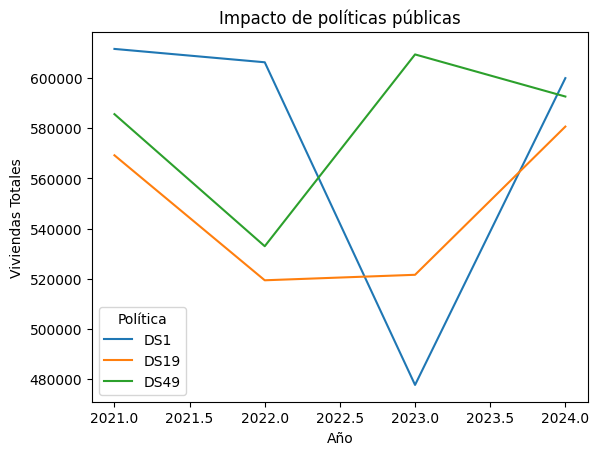

In [38]:
# 11. Evaluación de impacto de políticas antes/después (simplificado por año)
df_politicas_agg = df_politicas.groupby(['Política', 'Año']).agg({'Viviendas Totales':'sum'}).reset_index()
sns.lineplot(data=df_politicas_agg, x='Año', y='Viviendas Totales', hue='Política')
plt.title("Impacto de políticas públicas")
plt.show()

In [15]:
# 12. Simulación de políticas (hipotético: +20% subsidios → viviendas crecen 10%)
df_sim = df_politicas.copy()
df_sim['Subsidios Simulados'] = df_sim['Subsidios Otorgados'] * 1.2
df_sim['Viviendas Simuladas'] = df_sim['Viviendas Totales'] * 1.1
print("Simulación política:")
print(df_sim[['Política', 'Comuna', 'Subsidios Otorgados', 'Subsidios Simulados', 'Viviendas Totales', 'Viviendas Simuladas']])

Simulación política:
   Política       Comuna  Subsidios Otorgados  Subsidios Simulados  \
0       DS1     Santiago                 4801               5761.2   
1      DS19     Santiago                 1052               1262.4   
2      DS49     Santiago                 2734               3280.8   
3       DS1     Santiago                 5996               7195.2   
4      DS19     Santiago                 3099               3718.8   
5      DS49     Santiago                 1949               2338.8   
6       DS1     Santiago                 1167               1400.4   
7      DS19     Santiago                 5070               6084.0   
8      DS49     Santiago                 3439               4126.8   
9       DS1     Santiago                 2958               3549.6   
10     DS19     Santiago                 4443               5331.6   
11     DS49     Santiago                 1915               2298.0   
12      DS1  Puente Alto                 1413               1695.6   

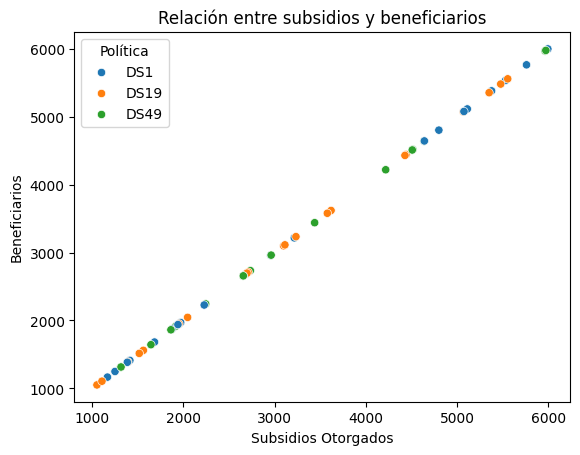

In [40]:
# 13. Relación beneficiarios vs subsidios
sns.scatterplot(data=df_politicas, x='Subsidios Otorgados', y='Beneficiarios', hue='Política')
plt.title("Relación entre subsidios y beneficiarios")
plt.show()

In [41]:
# 14. Clasificación por riesgo de informalidad
from sklearn.ensemble import RandomForestClassifier
X_class = df_modelo[['Densidad Hab/km2', 'Servicios Básicos']]
y_class = df_modelo['Riesgo Informalidad']
clf = RandomForestClassifier()
clf.fit(X_class, y_class)
df_modelo['pred_riesgo'] = clf.predict(X_class)
print("Clasificación de riesgo de informalidad:")
print(df_modelo[['Comuna', 'Riesgo Informalidad', 'pred_riesgo']])

Clasificación de riesgo de informalidad:
         Comuna Riesgo Informalidad pred_riesgo
0      Santiago                Bajo        Bajo
1      Santiago               Medio       Medio
2      Santiago                Bajo        Bajo
3      Santiago               Medio       Medio
4   Puente Alto                Bajo        Bajo
5   Puente Alto                Bajo        Bajo
6   Puente Alto                Bajo        Bajo
7   Puente Alto                Bajo        Bajo
8         Maipú               Medio       Medio
9         Maipú                Bajo        Bajo
10        Maipú               Medio       Medio
11        Maipú               Medio       Medio
12   La Florida                Bajo        Bajo
13   La Florida               Medio       Medio
14   La Florida               Medio       Medio
15   La Florida               Medio       Medio
16        Ñuñoa                Bajo        Bajo
17        Ñuñoa                Bajo        Bajo
18        Ñuñoa               Medio       Medio

In [59]:
# 1. Crear el modelo predictivo del valor UF/m2
from sklearn.ensemble import RandomForestRegressor

# Asegurarse de tener los datos necesarios
X = df_modelo[['Densidad Hab/km2', 'Servicios Básicos']]
y = df_modelo['Valor UF/m2']

# Entrenar el modelo
modelo_uf = RandomForestRegressor()
modelo_uf.fit(X, y)

# Agregar la predicción al DataFrame
df_modelo['pred_uf_m2'] = modelo_uf.predict(X)

# 2. Traer coordenadas desde hoja "Densidad poblacional"
# Asegúrate de tener esta hoja cargada como df_densidad
df_coords = df_densidad[['comuna', 'lat', 'lon']].drop_duplicates()

# 3. Hacer el merge entre modelo y coordenadas
df_modelo_coords = df_modelo.merge(df_coords, left_on='Comuna', right_on='comuna', how='left')

# 4. Verificar columnas
print(df_modelo_coords.columns)

# 5. Graficar usando Plotly (usa lat_y y lon_y si aparecen tras el merge)
import plotly.express as px

fig = px.scatter_geo(
    df_modelo_coords,
    lat='lat_y',  # o 'lat_y' si aparece así
    lon='lon_y',  # o 'lon_y'
    color='pred_uf_m2',
    hover_name='Comuna',
    title='Predicción valor UF/m2'
)
fig.show()


Index(['Comuna', 'Año', 'Valor UF/m2', 'Densidad Hab/km2', 'Servicios Básicos',
       'Riesgo Informalidad', 'pred_riesgo', 'lat_x', 'lon_x', 'pred_uf_m2',
       'comuna', 'lat_y', 'lon_y'],
      dtype='object')


In [57]:
print(df_modelo_coords.columns)


Index(['Comuna', 'Año', 'Valor UF/m2', 'Densidad Hab/km2', 'Servicios Básicos',
       'Riesgo Informalidad', 'pred_riesgo', 'lat_x', 'lon_x', 'comuna',
       'lat_y', 'lon_y'],
      dtype='object')


In [46]:
# DASHBOARD Y AUTOMATIZACIÓN
import streamlit as st

def app():
    st.set_page_config(layout="wide")
    st.title("Dashboard Urbano - Análisis Integral")

    st.header("Déficit habitacional por comuna")
    comuna_seleccionada = st.selectbox("Selecciona una comuna", df_deficit['Comuna'].unique())
    df_comuna = df_deficit[df_deficit['Comuna'] == comuna_seleccionada]
    st.line_chart(df_comuna.set_index('Año')['Déficit Vivienda'])

    st.header("Densidad poblacional")
    st.map(df_densidad.rename(columns={"lat": "latitude", "lon": "longitude"}))

    st.header("Avance físico vs financiero de proyectos")
    st.dataframe(df_proyectos[['comuna', 'avance_fisico_%', 'avance_financiero_%', 'duracion_total']])

    st.header("Proyección de valor UF/m2")
    st.dataframe(df_modelo[['Comuna', 'Valor UF/m2', 'pred_uf_m2']])

    st.header("Subsidios otorgados por política")
    st.dataframe(df_politicas)


In [50]:
import pandas as pd

archivo = 'dataset vivienda y urbanismo.xlsx'
excel = pd.ExcelFile(archivo)
print(excel.sheet_names)


['Densidad poblacional', 'Zonas Crecimiento Urbano', 'Proyecciones Expansión Urbana', 'Cuellos de Botella Proyectos', 'Historicos subsidios', 'Deficit habitacional', 'Politicas publicas', 'Modelos predictivos']


In [55]:
print(df_modelo_coords.columns)


Index(['Comuna', 'Año', 'Valor UF/m2', 'Densidad Hab/km2', 'Servicios Básicos',
       'Riesgo Informalidad', 'pred_riesgo', 'lat_x', 'lon_x', 'comuna',
       'lat_y', 'lon_y'],
      dtype='object')
